In [2]:
import pandas as pd 
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data_churn.csv

--2025-11-10 05:13:38--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data_churn.csv’

data_churn.csv      100%[===================>] 954.59K  --.-KB/s    in 0.006s  

2025-11-10 05:13:39 (157 MB/s) - ‘data_churn.csv’ saved [977501/977501]



In [3]:
df = pd.read_csv('data_churn.csv')

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
cat_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in cat_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')


In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [13]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [14]:
df.totalcharges = df.totalcharges.fillna(0)

In [15]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [16]:
df.churn = (df.churn == 'yes').astype(int)

In [17]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_test_split(df,test_size=0.2, random_state=1)

[      customerid  gender  seniorcitizen partner dependents  tenure  \
 1814  5442-pptjy    male              0     yes        yes      12   
 5946  6261-rcvns  female              0      no         no      42   
 3881  2176-osjuv    male              0     yes         no      71   
 2389  6161-erdgd    male              0     yes        yes      71   
 3676  2364-ufrom    male              0      no         no      30   
 ...          ...     ...            ...     ...        ...     ...   
 905   0781-lkxbr    male              1      no         no       9   
 5192  3507-gasnp    male              0      no        yes      60   
 3980  8868-wozgu    male              0      no         no      28   
 235   1251-krreg    male              0      no         no       2   
 5157  5840-nvdcg  female              0     yes        yes      16   
 
      phoneservice multiplelines internetservice       onlinesecurity  ...  \
 1814          yes            no              no  no_internet_servic

In [20]:
df_full_train, df_test = train_test_split(df,test_size=0.2, random_state=1)

In [21]:
len(df_full_train), len(df_test)

(5634, 1409)

In [22]:
df_train , df_val = train_test_split(df_full_train,test_size=0.25, random_state=1)

In [23]:
len(df_train), len(df_test),len(df_val)

(4225, 1409, 1409)

In [24]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [25]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [26]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [27]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [28]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [29]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

np.float64(0.27)

In [30]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [31]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [32]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [33]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male= df_full_train[df_full_train.gender == 'female'].churn.mean()


In [34]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [35]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()

In [36]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_partner, churn_no_partner

(np.float64(0.20503330866025166), np.float64(0.3298090040927694))

In [37]:
global_churn_rate - churn_partner, global_churn_rate - churn_no_partner

(np.float64(0.06493474245795922), np.float64(-0.05984095297455855))

In [38]:
churn_no_partner/global_churn_rate

np.float64(1.2216593879412643)

In [39]:
churn_partner/global_churn_rate

np.float64(0.7594724924338315)

In [40]:
df_full_train.groupby('gender').churn.agg(['mean','count'])


,mean,count
gender,,
female,0.276824,2796
male,0.263214,2838


In [41]:
from IPython.display import display

In [42]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk']= df_group['mean']/global_churn_rate
    display (df_group)
    print('-------------------')   
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


-------------------



,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


-------------------



,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


-------------------



,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


-------------------



,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


-------------------



,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


-------------------



,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


-------------------



,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


-------------------



,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


-------------------



,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


-------------------



,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


-------------------



,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


-------------------



,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


-------------------



,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


-------------------



,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


-------------------



,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


-------------------



In [43]:
from sklearn.metrics import mutual_info_score


In [44]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [46]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [47]:
def mutual_info_score_churn(series):
    return mutual_info_score(series,df_full_train.churn)


In [48]:
from sklearn.metrics import mutual_info_score

def mutual_info_score_churn(col_name):
    return mutual_info_score(df_full_train[col_name], df_full_train['churn'])

# Apply it to each categorical feature
mi = {col: mutual_info_score_churn(col) for col in categorical}
mi = pd.Series(mi).sort_values(ascending=False)

print(mi)


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64


In [49]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [50]:
df_full_train[(df_full_train.tenure>2)].churn.mean()

np.float64(0.22478269658378816)

In [51]:
df_full_train[(df_full_train.tenure>12)].churn.mean()

np.float64(0.17634908339788277)

In [52]:
df_full_train[(df_full_train.tenure>12)].churn.mean()

np.float64(0.17634908339788277)

In [53]:
from sklearn.feature_extraction import DictVectorizer

dicts = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')

In [54]:
dv  = DictVectorizer(sparse=False)
dv = dv.fit(dicts)

In [55]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [56]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [57]:
dicts = df_train[categorical+numerical].to_dict(orient='records')

In [58]:
dv  = DictVectorizer(sparse=False)
dv = dv.fit(dicts)

In [59]:
X_train = dv.transform(dicts)

In [60]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [61]:
val_dicts = df_val[categorical+numerical].to_dict(orient='records')

In [62]:
X_val = dv.transform(val_dicts)

In [63]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [64]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
y

array([0.00669285, 0.00739896, 0.00817894, 0.00904041, 0.00999169,
       0.01104196, 0.01220126, 0.01348063, 0.01489212, 0.01644893,
       0.01816549, 0.02005754, 0.0221422 , 0.02443814, 0.02696557,
       0.02974643, 0.03280439, 0.036165  , 0.0398557 , 0.04390588,
       0.04834692, 0.05321217, 0.0585369 , 0.06435824, 0.07071501,
       0.07764755, 0.0851974 , 0.093407  , 0.1023192 , 0.11197671,
       0.12242144, 0.13369374, 0.14583148, 0.1588691 , 0.17283646,
       0.18775769, 0.20364993, 0.22052213, 0.23837374, 0.25719365,
       0.2769591 , 0.29763488, 0.31917283, 0.34151151, 0.36457644,
       0.38828059, 0.41252537, 0.43720205, 0.46219351, 0.48737642,
       0.51262358, 0.53780649, 0.56279795, 0.58747463, 0.61171941,
       0.63542356, 0.65848849, 0.68082717, 0.70236512, 0.7230409 ,
       0.74280635, 0.76162626, 0.77947787, 0.79635007, 0.81224231,
       0.82716354, 0.8411309 , 0.85416852, 0.86630626, 0.87757856,
       0.88802329, 0.8976808 , 0.906593  , 0.9148026 , 0.92235

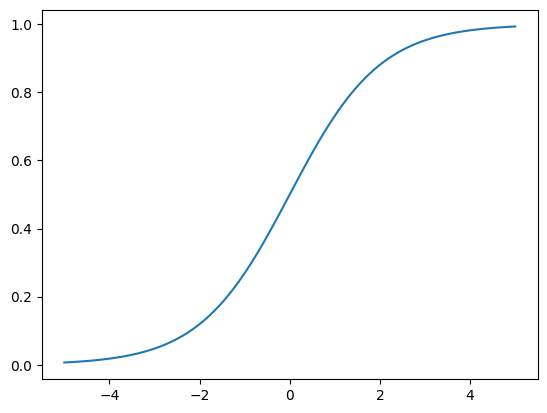

In [65]:
from matplotlib import pyplot as plt
plt.plot(x,y)

In [66]:
sigmoid(100)

np.float64(1.0)

In [67]:
sigmoid(1000)

np.float64(1.0)

In [68]:
def linear_regressio(xi):
    result = w0 

    for j in range (len(w)):
        score = score + w[j] * xi[j]
        result = sigmoid(score)
        return result

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
model.coef_[0].round(3)

array([ 0.564, -0.154, -0.519, -0.013, -0.095,  0.071, -0.098, -0.082,
       -0.033, -0.076, -0.354,  0.343, -0.098,  0.002, -0.251,  0.162,
       -0.02 ,  0.066, -0.098, -0.076,  0.251, -0.098, -0.261, -0.228,
        0.119, -0.121,  0.012, -0.095, -0.03 ,  0.045, -0.028,  0.162,
       -0.271,  0.221, -0.097, -0.098,  0.087, -0.05 , -0.098,  0.039,
        0.194, -0.098, -0.205, -0.072,  0.   ])

In [71]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1], shape=(4225,))

In [72]:
model.predict_proba(X_train)

array([[0.91088688, 0.08911312],
       [0.33128828, 0.66871172],
       [0.36229559, 0.63770441],
       ...,
       [0.48776317, 0.51223683],
       [0.96993479, 0.03006521],
       [0.2971009 , 0.7028991 ]], shape=(4225, 2))

In [73]:
model.predict_proba(X_train)[:,1]

array([0.08911312, 0.66871172, 0.63770441, ..., 0.51223683, 0.03006521,
       0.7028991 ], shape=(4225,))

In [74]:
y_pred  = model.predict_proba(X_val)[:,1]

In [75]:
churn_decision= y_pred > 0.5
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

In [76]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 322, dtype: object

In [77]:
y_val

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [78]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [79]:
y_val == churn_decision.astype(int)

array([ True,  True,  True, ...,  True,  True,  True], shape=(1409,))

In [80]:
(y_val == churn_decision.astype(int)).mean()

np.float64(0.801277501774308)

In [81]:
df_pred = pd.DataFrame()
df_pred['probability_of_churn'] = y_pred
df_pred['churn_decision'] = churn_decision.astype(int)
df_pred['actual_churn'] = y_val
df_pred.head(10)

,probability_of_churn,churn_decision,actual_churn
0,0.007863,0,0
1,0.209928,0,0
2,0.223710,0,0
3,0.561123,1,1
4,0.219586,0,0
5,0.229380,0,0
6,0.032530,0,0
7,0.002139,0,0
8,0.590631,1,1
9,0.483748,0,1


In [82]:
df_pred['correct']= df_pred['churn_decision'] == df_pred['actual_churn']

In [83]:
df_pred.head(10)

,probability_of_churn,churn_decision,actual_churn,correct
0,0.007863,0,0,True
1,0.209928,0,0,True
2,0.223710,0,0,True
3,0.561123,1,1,True
4,0.219586,0,0,True
5,0.229380,0,0,True
6,0.032530,0,0,True
7,0.002139,0,0,True
8,0.590631,1,1,True
9,0.483748,0,1,False


In [84]:
df_pred['correct'].mean()

np.float64(0.801277501774308)

In [85]:
zips = zip(dv.get_feature_names_out(), model.coef_[0].round(3))

In [86]:
dict(zips)

{'contract=month-to-month': np.float64(0.564),
 'contract=one_year': np.float64(-0.154),
 'contract=two_year': np.float64(-0.519),
 'dependents=no': np.float64(-0.013),
 'dependents=yes': np.float64(-0.095),
 'deviceprotection=no': np.float64(0.071),
 'deviceprotection=no_internet_service': np.float64(-0.098),
 'deviceprotection=yes': np.float64(-0.082),
 'gender=female': np.float64(-0.033),
 'gender=male': np.float64(-0.076),
 'internetservice=dsl': np.float64(-0.354),
 'internetservice=fiber_optic': np.float64(0.343),
 'internetservice=no': np.float64(-0.098),
 'monthlycharges': np.float64(0.002),
 'multiplelines=no': np.float64(-0.251),
 'multiplelines=no_phone_service': np.float64(0.162),
 'multiplelines=yes': np.float64(-0.02),
 'onlinebackup=no': np.float64(0.066),
 'onlinebackup=no_internet_service': np.float64(-0.098),
 'onlinebackup=yes': np.float64(-0.076),
 'onlinesecurity=no': np.float64(0.251),
 'onlinesecurity=no_internet_service': np.float64(-0.098),
 'onlinesecurity=yes

In [87]:
dict(zips)

{}

In [88]:
small = ['contract', 'tenure', 'monthlycharges']


In [89]:
dicts_train_small= df_train[small].to_dict(orient='records')

In [90]:
dicts_val_small= df_val[small].to_dict(orient='records')

In [91]:
dv_small = DictVectorizer(sparse=False)
dv_small = dv_small.fit(dicts_train_small)

In [92]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [93]:
X_train_small = dv_small.transform(dicts_train_small)

In [94]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [95]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595829565)

In [96]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [97]:
feature_weights = dict(zip(dv_small.get_feature_names_out(), w.round(3)))
feature_weights

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [98]:
full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [99]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train)
y_full_train = df_full_train.churn.values

In [100]:
model = LogisticRegression()

model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [101]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [102]:
X_test = dv.transform(dicts_test)

In [103]:
y_pred = model.predict_proba(X_test)[:,1]

In [104]:
churn_decision  = y_pred >= 0.5 
churn_decision

array([False, False, False, ..., False, False,  True], shape=(1409,))

In [105]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

In [106]:
dicts_test[-1]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [107]:
customer = dicts_test[-1]
X_customer = dv.transform([customer])
X_customer.shape


(1, 45)

In [108]:
model.predict_proba(X_customer)[0,1]

np.float64(0.6613470087309817)

In [109]:
y_test[10]

np.int64(0)

# Accuracy and dummy model

In [110]:
len(y_val)

1409

In [111]:
(y_val==churn_decision).mean()

np.float64(0.6167494677075941)

In [112]:
(y_val==churn_decision).sum()

np.int64(869)

In [113]:
869/1409

0.6167494677075941

In [ ]:
from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

NameError: name 'accuracy_score' is not defined

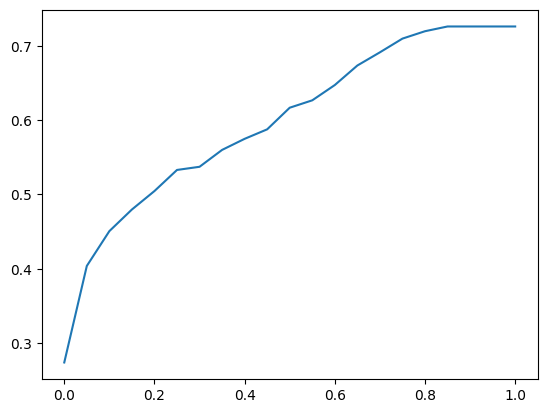

In [ ]:
plt.plot(thresholds, scores)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.75)

0.7097232079489

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred >= 0.5)

0.6167494677075941

In [ ]:
thresholds = np.linspace(0,1,21)
scores = []

for t in thresholds:
    score= accuracy_score(y_val,y_pred >= t )
    scores.append(score)

    print(f'threshold: {t:.2f}  accuracy: {score:.3f}')

threshold: 0.00  accuracy: 0.274
threshold: 0.05  accuracy: 0.404
threshold: 0.10  accuracy: 0.451
threshold: 0.15  accuracy: 0.480
threshold: 0.20  accuracy: 0.505
threshold: 0.25  accuracy: 0.533
threshold: 0.30  accuracy: 0.537
threshold: 0.35  accuracy: 0.560
threshold: 0.40  accuracy: 0.575
threshold: 0.45  accuracy: 0.588
threshold: 0.50  accuracy: 0.617
threshold: 0.55  accuracy: 0.627
threshold: 0.60  accuracy: 0.647
threshold: 0.65  accuracy: 0.674
threshold: 0.70  accuracy: 0.691
threshold: 0.75  accuracy: 0.710
threshold: 0.80  accuracy: 0.720
threshold: 0.85  accuracy: 0.726
threshold: 0.90  accuracy: 0.726
threshold: 0.95  accuracy: 0.726
threshold: 1.00  accuracy: 0.726


In [ ]:
y_pred >= 1 

array([False, False, False, ..., False, False, False], shape=(1409,))

In [ ]:
from collections import Counter
Counter(y_pred >= 1 )

Counter({np.False_: 1409})

In [ ]:
y_val.mean()

np.float64(0.2739531582682754)

In [ ]:
1 - y_val.mean()

np.float64(0.7260468417317246)

# Confusion table


In [ ]:
actual_positive = (y_val == 1)
acutal_negative = (y_val == 0)
t = 0.45
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)
tp = (actual_positive & predicted_positive).sum()
tn = (acutal_negative & predicted_negative).sum()

In [ ]:
p

np.float64(0.24)

In [ ]:
fp = (acutal_negative & predicted_positive).sum()
fn = (actual_positive & predicted_negative).sum()
tp, tn, fp, fn

(np.int64(90), np.int64(738), np.int64(285), np.int64(296))

In [ ]:
confusion_matrix = np.array([[tn, fp],
                             [fn, tp]])
confusion_matrix / confusion_matrix.sum().round(2)

array([[0.52377573, 0.20227111],
       [0.21007807, 0.06387509]])

In [ ]:
p = tp / (tp + fp)
p

np.float64(0.24)